In [1]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset
import os
import re
from PIL import Image
from torch.utils.data import DataLoader

In [2]:
class MyDataset(Dataset):
    def __init__(self, filepath, transforms=None):
        super(MyDataset, self).__init__()
        self.img_files, self.lables = self.load_data(filepath)
        self.transforms = transforms

    def __getitem__(self, index):
        img_file, lable = self.img_files[index], self.lables[index]
        img_file = os.getcwd() + self.filepath + '\\' + img_file
        img = Image.open(img_file)
        if self.transforms:  # 采用自定义的transform来实现图片的转换，使之可以直接进入神经网络运算
            img = self.transforms(img)
        return img, lable

    def __len__(self):
        return len(self.lables)

    def load_data(self, filepath):
        img_file_names = os.listdir(filepath)  # 获取filepath下所有的文件名
        lables = []
        for name in img_file_names:
            lables.append(name.split('_')[0])
        return img_file_names, lables

In [3]:
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # 依据概率水平翻转（默认0.5）
    transforms.RandomRotation(20),  # 随机旋转
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 数据标准化，使其符合正态分布
])
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [4]:
train_path = 'FVC2002_DB1_A'
val_path = 'FVC2002_DB1_B'
train_dataset = MyDataset(train_path, transforms=train_transforms)
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)

In [ ]:
Image

In [ ]:
train_dataset

In [34]:
train_data = datasets.ImageFolder('Datasets', transform=transform)

In [35]:
# 将数据集进行第一次划分 train / test  获得index list
num_data = len(train_data)
indices_data = list(range(num_data))  # [0,.....,num_data-1]
np.random.shuffle(indices_data)  # 打乱顺序
# np.floor:向下取整 test_size:(0,1) 取部分
split_tt = int(np.floor(test_size * num_data))

# index list
train_idx, test_idx = indices_data[split_tt:], indices_data[:split_tt]

# 将train数据集划分为 train / validation   获得index list
num_train = len(train_idx)
indices_train = list(range(num_train))
np.random.shuffle(indices_train)
split_tv = int(np.floor(valid_size * num_train))

train_idx, valid_idx = indices_train[:split_tv], indices_train[:split_tv]

定义用于获取训练和验证批次的采样器，加载包含元组格式的数据将输入传递给模型

In [36]:
# define samplers for obtaining training and validation batches
train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_idx)
test_sampler = torch.utils.data.sampler.SubsetRandomSampler(test_idx)
valid_sampler = torch.utils.data.sampler.SubsetRandomSampler(valid_idx)

# Loaders contains the data in tuple format , The train_loader, test_loader and valid_loader will be used to pass the input to the model.
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size, sampler=train_sampler, num_workers=1)
valid_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size, sampler=valid_sampler, num_workers=1)
test_loader = torch.utils.data.DataLoader(
    train_data, sampler=test_sampler, batch_size=batch_size, num_workers=1)

In [54]:
classes = [0, 1]

In [55]:
for batch in valid_loader:
    print(batch[0].size())

torch.Size([8, 3, 374, 388])
torch.Size([8, 3, 374, 388])
torch.Size([8, 3, 374, 388])
torch.Size([8, 3, 374, 388])
torch.Size([8, 3, 374, 388])
torch.Size([8, 3, 374, 388])
torch.Size([8, 3, 374, 388])
torch.Size([5, 3, 374, 388])


F:\jupyter\envs\py36torch040\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


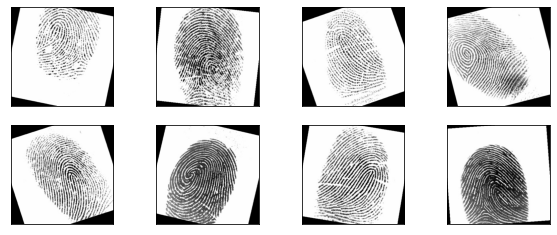

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image


def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image


# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()  # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(10, 4))
# display 8 images
for idx in np.arange(8):
    ax = fig.add_subplot(2, 8/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])